# Entanglement Spectrum of the Haldane Model

In [1]:
# --------------------------------------
# Entanglement spectrum of Haldane model
# --------------------------------------

from __future__ import print_function # python3 style print
from pythtb import * # import TB model class

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
%matplotlib inline
rcParams.update({"text.usetex": True, "font.size": 16})

In [2]:
# define setup of Haldane model
def set_model(delta,t,t2):
  lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
  orb=[[1./3.,1./3.],[2./3.,2./3.]]
  model=tb_model(2,2,lat,orb)
  model.set_onsite([-delta,delta])
  for lvec in ([ 0, 0], [-1, 0], [ 0,-1]):
    model.set_hop(t, 0, 1, lvec)
  for lvec in ([ 1, 0], [-1, 1], [ 0,-1]):
    model.set_hop(t2*1.j, 0, 0, lvec)
  for lvec in ([-1, 0], [ 1,-1], [ 0, 1]):
    model.set_hop(t2*1.j, 1, 1, lvec)
  return model

In [3]:
# set model parameters and construct bulk model
delta=0.7   # site energy shift
t=-1.0      # real first-neighbor hopping

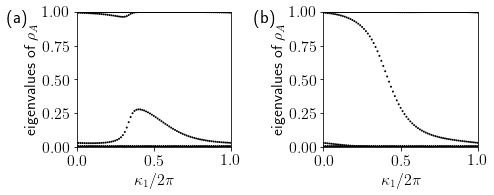

In [4]:
# set up figures
fig,ax=plt.subplots(1,2,figsize=(7,3))

# run over two choices of t2
for j2,t2 in enumerate([-0.10,-0.24]):

  my_model=set_model(delta,t,t2)

  # set up and solve ribbon model that is finite along direction 1
  width=20
  nkr=81
  ribbon_model=my_model.cut_piece(width,fin_dir=1,glue_edgs=False)
  (k_vec,k_dist,k_node)=ribbon_model.k_path('full',nkr,report=False)
  (rib_eval,rib_evec)=ribbon_model.solve_all(k_vec,eig_vectors=True)
  
  nbands=rib_eval.shape[0]
  ax1=ax[j2]
  
  # entanglement spectrum
  k0=np.linspace(0.,1.,nkr)
  ax1.set_xlim(0.,1.)
  ax1.set_ylim(0.,1)
  ax1.set_xlabel(r"$\kappa_1/2\pi$")
  ax1.set_ylabel(r"eigenvalues of $\rho_A$")

  (nband,nk,norb)=rib_evec.shape
  ncut= int(norb/2)
  nocc= int(nband/2)

  for (i,kv) in enumerate(k0):
  
    # construct reduced density matrix for half of the chain
    dens_mat=np.zeros((ncut,ncut),dtype=complex)
    for nb in range(nocc):
      for j1 in range(ncut):
        for j2 in range(ncut):
          dens_mat[j1,j2] += np.conj(rib_evec[nb,i,j1])*rib_evec[nb,i,j2]

    # diagonalize
    spect=np.real(np.linalg.eigvals(dens_mat))
    # scatterplot
    s=ax1.scatter([k_vec[i]]*nocc, spect,
         s=4, c='k', marker='o', edgecolors='none')

# save figure as a PDF
aa=ax.flatten()
for i,lab in enumerate(['(a)','(b)']):
  aa[i].text(-0.45,0.92,lab,size=18.,transform=aa[i].transAxes)
fig.tight_layout()
plt.subplots_adjust(left=0.15,wspace=0.6)
#fig.savefig("haldane_entang.pdf")

plt.show()